In [ ]:
print("hello")

hello


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 #batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/project

/content/drive/MyDrive/project


In [ ]:
Celebrity_labels = [
 'Afran Nisho only Face',
 'Afsana Mimi',
 'Arfin Shuvoo onlyFace',
 'Ayub Bachchu only Face',
 'Chanchal Chowdhury',
 'Dr. Muhammad Yunus',
 'Fazle Hasan Abed only Face',
 'Humayun Ahmed',
 'James (Nagar Baul)',
 'Joya Ahsan only Face',
 'Mashrafe Bin Mortaza',
 'Mizanur Rahman Azhari only Face',
 'Mostofa Sarwar Farooki',
 'Sabina Khatun',
 'Sabina Yasmin only Face',
 'Shakib Al Hasan',
 'Shakib Khan',
 'Tahsan Khan',
 'Tamim Iqbal'
]
len(Celebrity_labels)

15

In [ ]:
images = search_images_ddg(Celebrity_labels[0])
f"No of images => {len(images)} -- One Image URL => {images[0]}"

'No of images => 200 -- One Image URL => https://www.thefamouspeople.com/profiles/images/muhammad-yunus-3.jpg'

In [ ]:
dest = "Dr. Muhammad Yunus.jpg"
download_url(images[0], dest, show_progress=False)

Path('Dr. Muhammad Yunus.jpg')

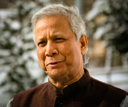

In [ ]:
image = Image.open(dest)
image.to_thumb(128,128)

In [ ]:
data_path = "DATA"
if not os.path.exists(data_path):
    os.mkdir(data_path)

for Celebrity_label in Celebrity_labels:

    dest = f"{data_path}/{Celebrity_label}"
    if not os.path.exists(dest):
        os.mkdir(dest)

    try:
      appliance_image_urls = search_images_ddg(Celebrity_label)
      download_images(dest, urls=appliance_image_urls)
    except:
      continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#2739) [Path('Data/Dr. Muhammad Yunus/c461133a-159f-40c8-a026-8ee4444dc57b.jpg'),Path('Data/Dr. Muhammad Yunus/7364ae5c-e292-4e43-91b1-4c6358ad6b33.jpg'),Path('Data/Dr. Muhammad Yunus/7b124604-0af8-4158-99ff-061e44e3e335.jpg'),Path('Data/Dr. Muhammad Yunus/c2fb8566-38b4-4397-a35f-f4bc444d3a8a.jpg'),Path('Data/Dr. Muhammad Yunus/ff83ad1f-3a5d-4053-aaf8-a1d7386e3c74.jpg'),Path('Data/Dr. Muhammad Yunus/4ef9594d-49a5-4e7d-8f48-11ebfd8c70e9.jpg'),Path('Data/Dr. Muhammad Yunus/2c905523-f6d6-465e-a66e-8963165ac7ba.jpg'),Path('Data/Dr. Muhammad Yunus/c07d9d92-bd74-4f9d-92f3-afc200930a03.jpg'),Path('Data/Dr. Muhammad Yunus/7ac39617-0a61-4e30-9e05-ae6d03783217.jpg'),Path('Data/Dr. Muhammad Yunus/73d46780-6973-4a70-8165-d5681f2e64e8.jpg'),Path('Data/Dr. Muhammad Yunus/fc5916d8-75ce-4f13-86b7-db17c779eef5.jpg'),Path('Data/Dr. Muhammad Yunus/4107b8d6-4b96-4b11-aac5-856f8b2ab3f6.jpg'),Path('Data/Dr. Muhammad Yunus/954a6b04-2056-486b-9692-4df8c1ebb205.jpg'),Path('Data/Dr. Muhammad Yunus/2e634128-185

In [ ]:
failed = verify_images(image_counts)
failed

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


(#188) [Path('Data/Dr. Muhammad Yunus/69119b7b-0d3c-4fd6-95c8-691244ec3a35.jpg'),Path('Data/Dr. Muhammad Yunus/a7d86e9e-0ea8-45d2-b310-33dcafc0a5d2.jpg'),Path('Data/Dr. Muhammad Yunus/4c9b3bbd-248f-4bba-92d5-24b164dc57d1.jpg'),Path('Data/Dr. Muhammad Yunus/8cf30d05-5848-4ecb-b4d4-9b9b397709d1.jpg'),Path('Data/Dr. Muhammad Yunus/7bc18694-e52e-456d-87d8-018a1c03c59c.png'),Path('Data/Dr. Muhammad Yunus/b52db03b-a07b-45e6-9a8f-a15243485dcd.jpg'),Path('Data/Dr. Muhammad Yunus/02e72f65-5f28-4900-9aec-a3f18436ae79.jpg'),Path('Data/Dr. Muhammad Yunus/190f957e-8085-49cb-826f-61263468dfe6.jpg'),Path('Data/Tamim Iqbal/7aa9d9a9-558c-480c-93ed-ee3935c208fa.jpg'),Path('Data/Tamim Iqbal/7250e9fa-0a59-4000-82b0-92f913aebbe6.jpg'),Path('Data/Tamim Iqbal/3da158a9-01fa-432f-89e7-6b53a53e28dd.jpg'),Path('Data/Tamim Iqbal/48144d57-abbf-4db6-ae02-760674305731.jpg'),Path('Data/Tamim Iqbal/1071aa3f-ef76-4f6c-a57e-c81ad48ae00e.jpg'),Path('Data/Tamim Iqbal/6ff8a12d-bf92-4a2e-8859-006ad19f70f8.png'),Path('Data/T

In [ ]:
failed.map(Path.unlink)

(#188) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

From Data to Data Loaders

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

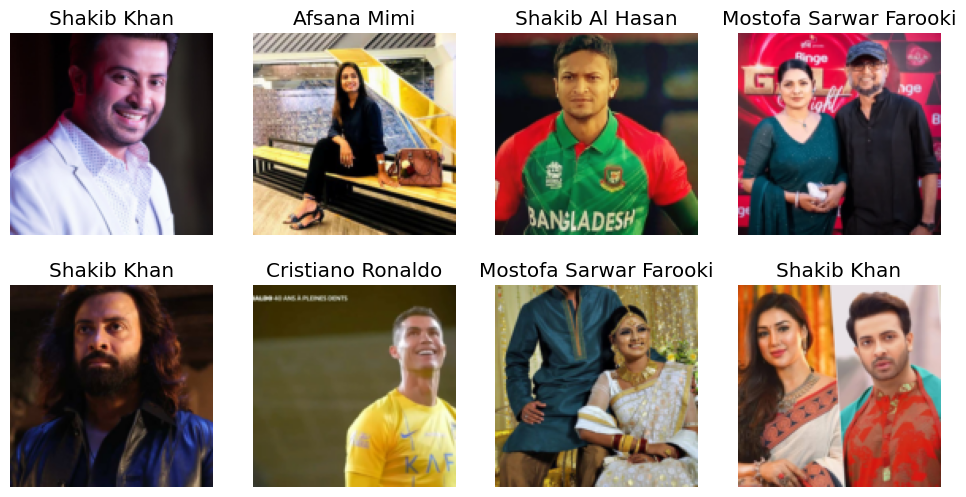

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

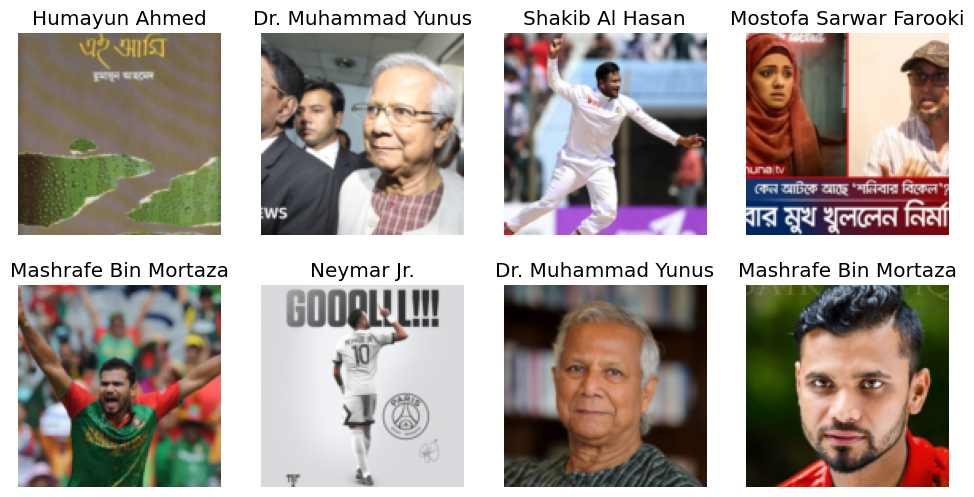

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

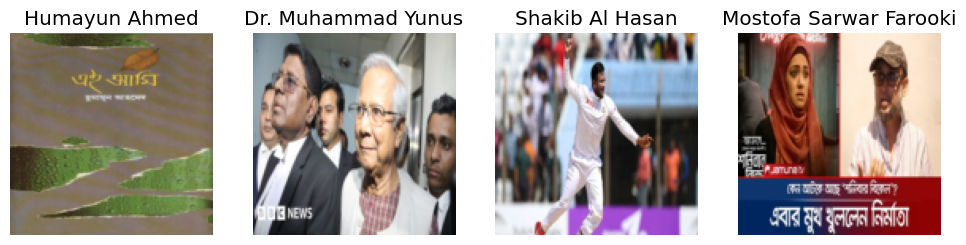

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

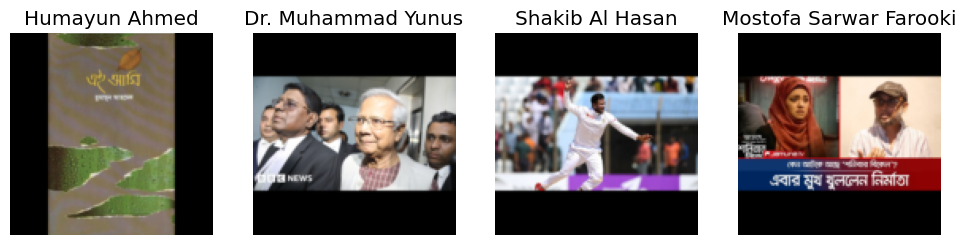

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

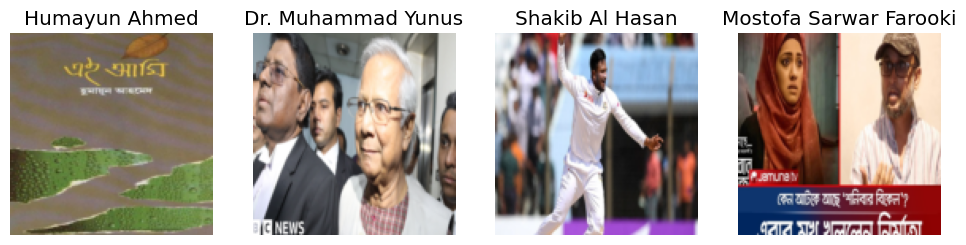

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
doc(aug_transforms)

,Type,Default,Details,
mult,float,1.0,"Multiplication applying to `max_rotate`,`max_lighting`,`max_warp`",
do_flip,bool,True,Random flipping,
flip_vert,bool,False,Flip vertically,
max_rotate,float,10.0,Maximum degree of rotation,
min_zoom,float,1.0,Minimum zoom,
max_zoom,float,1.1,Maximum zoom,
max_lighting,float,0.2,Maximum scale of changing brightness,
max_warp,float,0.2,Maximum value of changing warp per,
p_affine,float,0.75,Probability of applying affine transformation,
p_lighting,float,0.75,Probability of changing brightnest and contrast,


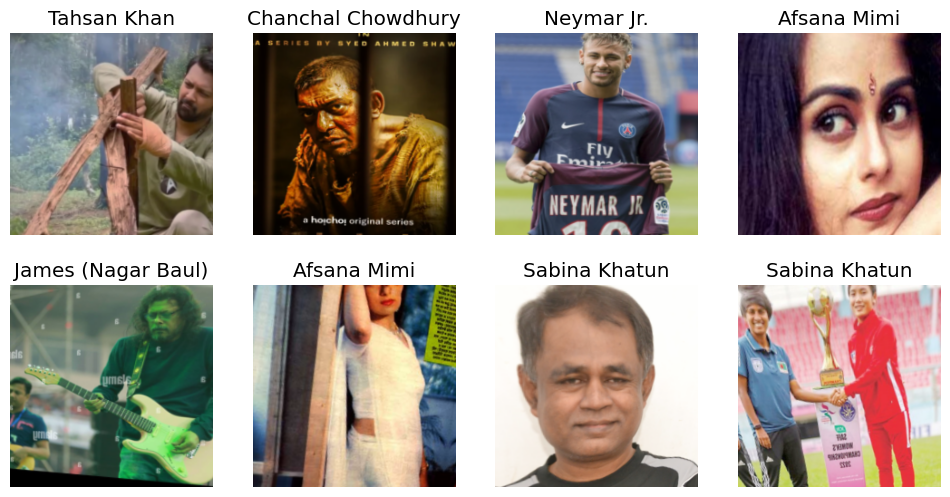

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "Celebrity_dataloader_v11.pkl")